In [83]:
# Read in Libraries (Dont know if we will need all, just installed everything that we've used in class)
!pip install folium
!pip install xarray
!pip install netcdf4
!pip install contextily
!pip install seaborn contextily pointpats
!pip install rasterio
!pip install geopandas
!pip install gemgis

^C
ERROR: Operation cancelled by user


In [41]:
#Import libraries
import folium
import ee
import geemap.foliumap as geemap
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import seaborn as sns
import matplotlib as mpl
from shapely import Point, wkt, Polygon
import rasterio
import os
import gemgis as gg
import shapely.geometry as sg

# Our Datasets

In [93]:
# Read in files:
raceresults = pd.read_csv('Formula1_2018Season_RaceResults.csv')
print(raceresults.dtypes)
print(raceresults)

Overtakes = pd.read_csv('2018 Overtakes - Sheet1.csv')
print(Overtakes)

# gdf = gpd.read_file("polylines3.shp", restore_shx=True)
# print(gdf.info())
# print(gdf.head())
# gdf

Track            object
Position         object
No                int64
Driver           object
Team             object
Starting Grid     int64
Laps              int64
Time/Retired     object
Points            int64
Fastest Lap      object
dtype: object
         Track Position  No            Driver                       Team  \
0    Australia        1   5  Sebastian Vettel                    Ferrari   
1    Australia        2  44    Lewis Hamilton                   Mercedes   
2    Australia        3   7    Kimi Raikkönen                    Ferrari   
3    Australia        4   3  Daniel Ricciardo  Red Bull Racing Tag Heuer   
4    Australia        5  14   Fernando Alonso            McLaren Renault   
..         ...      ...  ..               ...                        ...   
415  Abu Dhabi       NC  10      Pierre Gasly  Scuderia Toro Rosso Honda   
416  Abu Dhabi       NC  31      Esteban Ocon       Force India Mercedes   
417  Abu Dhabi       NC   9   Marcus Ericsson             Saub

# Heatmap Code

In [85]:
# Manipulating Data
# Extracting Coordinates
gdf1 = gpd.GeoDataFrame(geometry=[])

coords_list = [
    (144.96863, -37.84974), #Australia, AUS
    (50.51054, 26.03176), #Bahrain, BAHR
    (49.85322, 40.37268), #Azerbaijan, AZR
    (2.26126, 41.57002), #Spain, SPN
    (121.21838, 31.33683), #China, CN 
    (7.42714, 43.73944), #Monaco, MON
    (-73.52324, 45.50180), #Montreal, CAN
    (5.79160, 43.25200), #France, FRAN
    (14.76559, 47.22013), #Austria, AUST
    (-1.01530, 52.07879), #Britian, Britian   
    (8.56585, 49.32780), #Germany, GER
    (19.24676, 47.57982), #Hungary, HUNG
    (5.96450, 50.44482), #Belgium, BELG 
    (9.28120, 45.61899), #Italy, ITLY 
    (103.86398, 1.29321), #Singapore, SING
    (39.96807, 43.40970), #Russia, RUS
    (136.54028, 34.84335), #Japan, JPN
    (-97.63963, 30.13175), #Austin, USA
    (-99.09338, 19.40610), #Mexico, MEX
    (-46.69997, -23.70375), #Brazil, BRZL
    (54.60546, 24.46997) #United Arab Emirates, UAE
]

GeoDataFrame with Point Geometries:
                       geometry
0   POINT (144.96863 -37.84974)
1     POINT (50.51054 26.03176)
2     POINT (49.85322 40.37268)
3      POINT (2.26126 41.57002)
4    POINT (121.21838 31.33683)
5      POINT (7.42714 43.73944)
6    POINT (-73.52324 45.50180)
7      POINT (5.79160 43.25200)
8     POINT (14.76559 47.22013)
9     POINT (-1.01530 52.07879)
10     POINT (8.56585 49.32780)
11    POINT (19.24676 47.57982)
12     POINT (5.96450 50.44482)
13     POINT (9.28120 45.61899)
14    POINT (103.86398 1.29321)
15    POINT (39.96807 43.40970)
16   POINT (136.54028 34.84335)
17   POINT (-97.63963 30.13175)
18   POINT (-99.09338 19.40610)
19  POINT (-46.69997 -23.70375)
20    POINT (54.60546 24.46997)

GeoDataFrame with X and Y coordinates of Point Geometries:
        x      y
0  -37.85 144.97
1   26.03  50.51
2   40.37  49.85
3   41.57   2.26
4   31.34 121.22
5   43.74   7.43
6   45.50 -73.52
7   43.25   5.79
8   47.22  14.77
9   52.08  -1.02
10  49.33   8

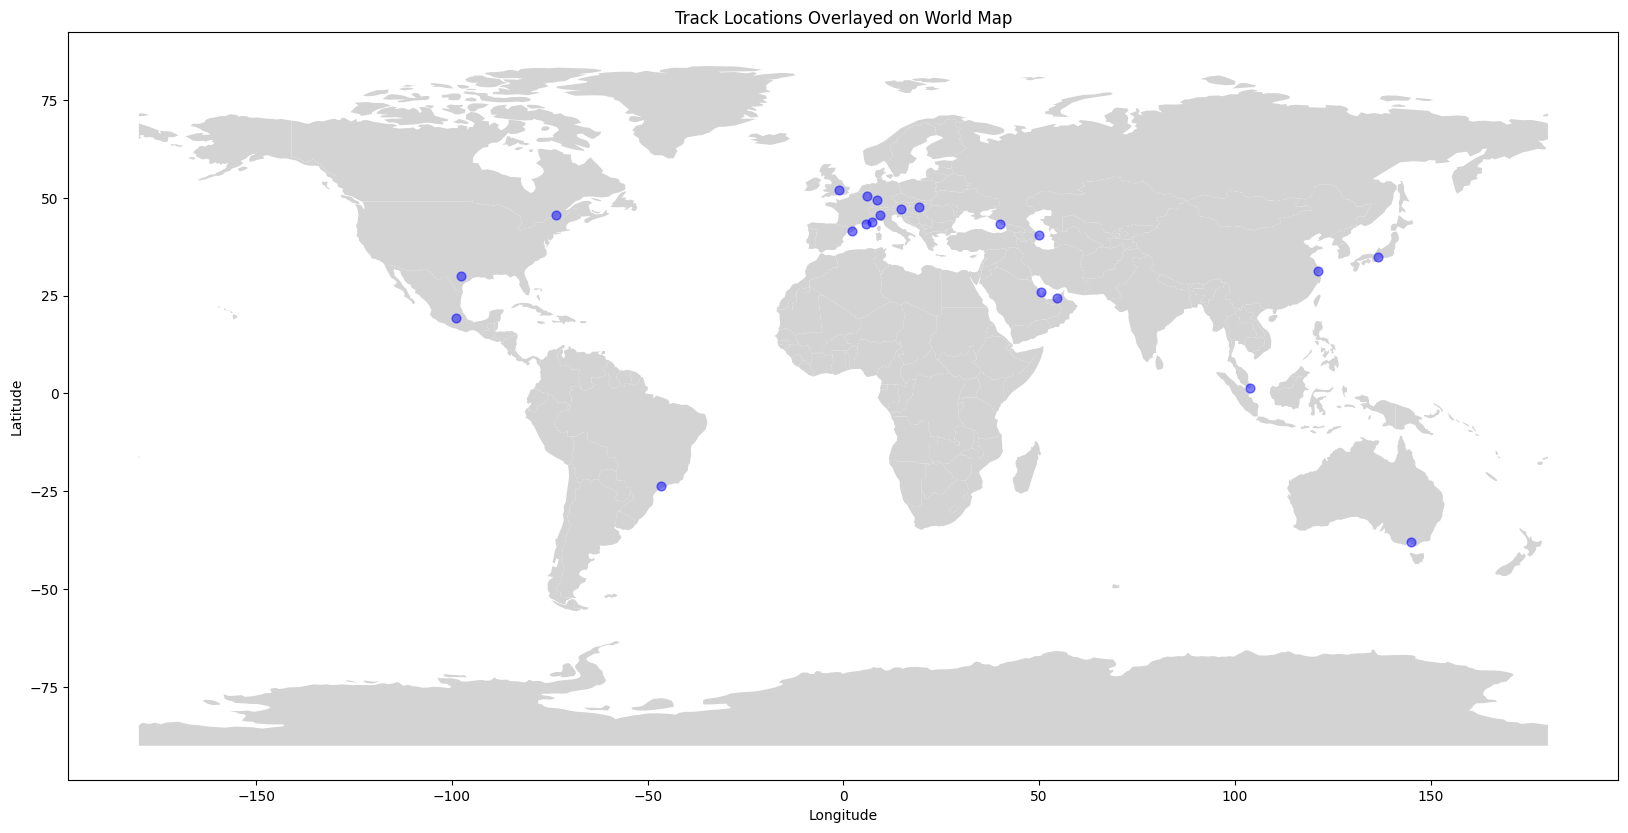

In [86]:
# Create Point geometries from coordinates and add to a new DataFrame
point_geoms = [sg.Point(coords) for coords in coords_list]
new_data = {'geometry': point_geoms}
new_gdf = gpd.GeoDataFrame(new_data, crs=gdf1.crs)

# Concatenate the original GeoDataFrame with the new GeoDataFrame
gdf1 = pd.concat([gdf1, new_gdf], ignore_index=True)

# Print the GeoDataFrame with Point geometries
print("GeoDataFrame with Point Geometries:")
print(gdf1)

# Extracting the X and Y coordinates of the Point geometries
gdf1_xy = gpd.GeoDataFrame({'x': gdf1.geometry.y,
                            'y': gdf1.geometry.x})

# Print the GeoDataFrame with X and Y coordinates of Point geometries
print("\nGeoDataFrame with X and Y coordinates of Point Geometries:")
print(gdf1_xy)

# Plot the polygons from the GeoDataFrame on top of the world map
fig, ax = plt.subplots(figsize=(20, 20))
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.plot(ax=ax, color='lightgrey')

gdf1.plot(ax=ax, alpha=0.5, marker='o', color='blue', markersize=40)

# Set plot title and axis labels
plt.title('Track Locations Overlayed on World Map')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show the plot
plt.show()

In [92]:
##Look at elements for each map (Seeing if I can loop / make more efficient)
"""
gdf.loc[0].geometry
gdf.loc[1].geometry
gdf.loc[2].geometry
gdf.loc[3].geometry
gdf.loc[4].geometry
gdf.loc[5].geometry
gdf.loc[6].geometry
gdf.loc[7].geometry
gdf.loc[8].geometry
gdf.loc[9].geometry
gdf.loc[10].geometry
gdf.loc[11].geometry
gdf.loc[12].geometry
gdf.loc[13].geometry
gdf.loc[14].geometry
gdf.loc[15].geometry
gdf.loc[16].geometry
gdf.loc[17].geometry
gdf.loc[18].geometry
gdf.loc[19].geometry
gdf.loc[20].geometry
"""

'\ngdf.loc[0].geometry\ngdf.loc[1].geometry\ngdf.loc[2].geometry\ngdf.loc[3].geometry\ngdf.loc[4].geometry\ngdf.loc[5].geometry\ngdf.loc[6].geometry\ngdf.loc[7].geometry\ngdf.loc[8].geometry\ngdf.loc[9].geometry\ngdf.loc[10].geometry\ngdf.loc[11].geometry\ngdf.loc[12].geometry\ngdf.loc[13].geometry\ngdf.loc[14].geometry\ngdf.loc[15].geometry\ngdf.loc[16].geometry\ngdf.loc[17].geometry\ngdf.loc[18].geometry\ngdf.loc[19].geometry\ngdf.loc[20].geometry\n'

In [88]:
## Country Dataframes
# Making Dataframes for Every Country
races_countries = {
    "Australia": "AUS", "Bahrain": "BAHR", "China": "CN", "Azerbaijan": "AZR", "Spain": "SPN",
    "Monaco": "MON", "Canada": "CAN", "France": "FRAN", "Austria": "AUST", "Britain": "Britian",
    "Germany": "GER", "Hungary": "HUNG", "Belgium": "BELG", "Italy": "ITLY", "Singapore": "SING",
    "Russia": "RUS", "Japan": "JPN", "USA": "USA", "Mexico": "MEX", "Brazil": "BRZL", "Abu Dhabi": "UAE"
}

In [89]:
# Create a dictionary to store the dataframes for each country
country_dataframes = {}

# Loop through each race and create a new dataframe for each country
for race, country_code in races_countries.items():
    country_dataframes[country_code] = Overtakes[Overtakes['Race'] == race].reset_index(drop=True)

# Print dataframes for each country
for country_code, dataframe in country_dataframes.items():
    print(f"Dataframe for {country_code}:")
    print(dataframe)
    print("\n" + "-"*50 + "\n")

# Create a new DataFrame for each country dynamically
for country_code, dataframe in country_dataframes.items():
    globals()[f"{country_code.lower()}_df"] = dataframe.copy()
    
# Counts for turns, based on country
dataframes = [
    aus_df, bahr_df, cn_df, azr_df, spn_df, mon_df, can_df, fran_df,
    aust_df, britian_df, ger_df, hung_df, belg_df, itly_df, sing_df,
    rus_df, jpn_df, usa_df, mex_df, brzl_df, uae_df
]

country_codes = [
    'AUS', 'BAHR', 'CN', 'AZR', 'SPN', 'MON', 'CAN', 'FRAN', 'AUST', 'Britian', 'GER',
    'HUNG', 'BELG', 'ITLY', 'SING', 'RUS', 'JPN', 'USA' 'MEX', 'BRZL', 'UAE'
]

for df, country_code in zip(dataframes, country_codes):
    # Calculate value counts for the 'Turn' column in the current DataFrame
    counts = df['Turn'].value_counts()

    # Print the value counts for the current country
    print(f"Value counts for {country_code}:")
    print(counts)
    print("-" * 50)

Dataframe for AUS:
        Race  Lap  Position  Overtaker   Overtakee        Live Turn
0  Australia    4        14     Bottas      Stroll         NaN  NaN
1  Australia    5         7  Ricciardo  Hulkenberg         Yes   13
2  Australia    9        13     Bottas        Ocon         Yes    3
3  Australia   32        13    Leclerc      Stroll  Background    1
4  Australia   35         8     Bottas   Vandoorne         NaN    1

--------------------------------------------------

Dataframe for BAHR:
       Race  Lap  Position   Overtaker Overtakee        Live Turn
0   Bahrain    2        10  Verstappen  Hamilton         Yes    1
1   Bahrain    2        16     Leclerc  Grosjean  Background    1
2   Bahrain    2        16    Grosjean   Leclerc  Background    4
3   Bahrain    4         6  Hulkenberg      Ocon         Yes   14
4   Bahrain    5         4   Magnussen     Gasly         Yes    1
..      ...  ...       ...         ...       ...         ...  ...
57  Bahrain   45        10       Sainz

In [90]:
# Merging stats and maps data
coords_list = [
    (144.96863, -37.84974), #Australia, AUS
    (50.51054, 26.03176), #Bahrain, BAHR
    (49.85322, 40.37268), #Azerbaijan, AZR
    (2.26126, 41.57002), #Spain, SPN
    (121.21838, 31.33683), #China, CN 
    (7.42714, 43.73944), #Monaco, MON
    (-73.52324, 45.50180), #Montreal, CAN
    (5.79160, 43.25200), #France, FRAN
    (14.76559, 47.22013), #Austria, AUST
    (-1.01530, 52.07879), #Britian, Britian   
    (8.56585, 49.32780), #Germany, GER
    (19.24676, 47.57982), #Hungary, HUNG
    (5.96450, 50.44482), #Belgium, BELG 
    (9.28120, 45.61899), #Italy, ITLY 
    (103.86398, 1.29321), #Singapore, SING
    (39.96807, 43.40970), #Russia, RUS
    (136.54028, 34.84335), #Japan, JPN
    (-97.63963, 30.13175), #Austin, USA
    (-99.09338, 19.40610), #Mexico, MEX
    (-46.69997, -23.70375), #Brazil, BRZL
    (54.60546, 24.46997) #United Arab Emirates, UAE
]

# Basic Summary Statistics for Racer Data

### Creating a Scatterplot to compare Start vs Finish Position

/var/folders/n1/35hd3snn46vg9_s9vqltxc2h0000gn/T/ipykernel_37925/4107178489.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_rr['Position'] = pd.to_numeric(filtered_rr['Position'])


<Figure size 600x600 with 0 Axes>

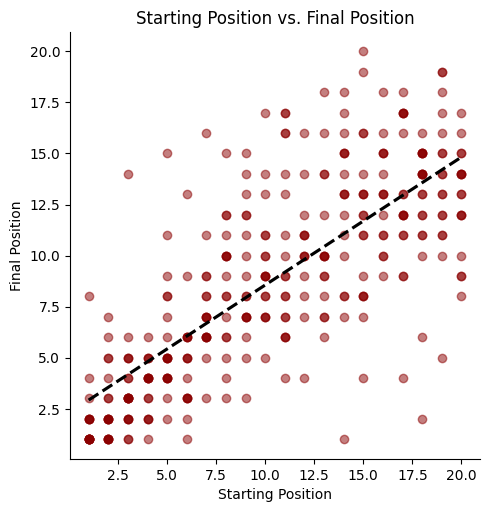

In [49]:
# Coverting to numeric and filtering out not classified and didn't qualify
filtered_rr = raceresults[(raceresults['Position'] != 'DQ') &
                          (raceresults['Position'] != 'NC')]
filtered_rr['Position'] = pd.to_numeric(filtered_rr['Position'])

# Creating scatterplot and trendline
plt.figure(figsize=(6, 6))
sns.lmplot(x='Starting Grid', y='Position', data=filtered_rr, ci=None, scatter_kws={"color": "darkred", "alpha": 0.5}, line_kws={"color": "black", "linestyle": "--"})
plt.xlabel('Starting Position')
plt.ylabel('Final Position')
plt.title('Starting Position vs. Final Position')
plt.show()

### Summary Statistics by Track

In [82]:
rrfl = raceresults.dropna(subset=['Fastest Lap'])
track_groups = raceresults.groupby('Track')

summary_statistics = track_groups['Fastest Lap'].describe() # need to change to get mean
print(summary_statistics)



              count unique       top freq
Track                                    
Abu Dhabi        19     19  1:41.357    1
Australia        20     20  1:26.469    1
Austria          20     20  1:07.442    1
Azerbaijan       18     18  1:45.412    1
Bahrain          18     18  1:34.453    1
Belgium          17     17  1:46.644    1
Brazil           20     20  1:11.795    1
Canada           18     17  1:16.180    2
China            20     20  1:35.785    1
France           18     17  1:38.319    2
Germany          20     20  1:15.545    1
Great Britain    19     19  1:30.696    1
Hungary          19     19  1:21.107    1
Italy            19     18  1:23.768    2
Japan            20     20  1:32.785    1
Mexico           20     20  1:19.186    1
Monaco           20     20  1:15.562    1
Russia           20     20  1:35.916    1
Singapore        19     19  1:42.913    1
Spain            17     17  1:19.133    1
United States    18     18  1:38.482    1
